## Figure 1

In [86]:
import json
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/NS/all.txt.annotation.filtered.averaged_rt.csv')
i=0
df[["word", "time"]][i:i+11].plot(drawstyle="steps-post", linewidth=2, legend=False, figsize=(10,3), color="black")
plt.axis('off')
plt.savefig('example.pdf')
plt.close('all')

# i=0
# df[["word", "time"]][i:i+11]

data = json.load(open('../results/NS/Llama-2-7b-hf/surprisal.json'))
pd.DataFrame(data["1"][0][:11]).plot(drawstyle="steps-post", linewidth=2, legend=False, figsize=(10,3))
# plt.show()
plt.axis('off')
plt.savefig('llama2-7b.pdf')
plt.close('all')

data = json.load(open('../results/NS/Llama-2-7b-chat-hf/surprisal.json'))
pd.DataFrame(data["1"][0][:11]).plot(drawstyle="steps-post", linewidth=2, legend=False, figsize=(10,3), color="green", )
# plt.show()
plt.axis('off')
plt.savefig('llama2-7b-inst.pdf')
plt.close('all')

data = json.load(open('../results/NS/Llama-2-7b-chat-hf/Please_complete_the_following_sentence_using_the_most_difficult_vocabulary_possible:_/surprisal.json'))
pd.DataFrame(data["1"][0][:11]).plot(drawstyle="steps-post", linewidth=2, legend=False, figsize=(10,3), color="orange")
# plt.show()
plt.axis('off')
plt.savefig('llama2-7b-inst-prompt.pdf')
plt.close('all')

data = json.load(open('../results/NS/Llama-2-13b-chat-hf/prompt_estimation/prompt_2.txt.json'))
index2token = {}
for token in data["1"][0].split("\n")[-3].split(", "):
    index = int(token.split(":")[0])
    token = token.split(":")[1].strip()
    index2token[index] = token

index2cost = {}
for i, token in enumerate(data["1"][0].split("\n")[-1].split(", ")):
    index = int(token.split(":")[0])
    token = token.split(":")[1].strip()
    index2cost[index] = i

x = [index2token[i] for i in range(11)]
y = [index2cost[i] for i in range(11)]
df = pd.DataFrame({"word": x, "cost": y})
df.plot(drawstyle="steps-post", linewidth=2, legend=False, figsize=(10,3), color="goldenrod")
# plt.show()
plt.axis('off')
plt.savefig('llama2-13b_estimate.pdf')
plt.close('all')

## DC

In [1]:
model_order = ["Llama-2-7b-hf",
                "Llama-2-7b-chat-hf",
                "Llama-2-13b-hf",
                "Llama-2-13b-chat-hf",
                "Llama-2-70b-hf",
                "Llama-2-70b-chat-hf",   
                "falcon-7b",
                "falcon-7b-instruct",
                "falcon-40b",
                "falcon-40b-instruct",
                "opt-125m",
                "opt-350m",
                "opt-1.3b", 
                "opt-2.7b",
                "opt-6.7b",
                "opt-13b",
                "opt-30b",
                "opt-66b", 
                "gpt2",
                "gpt2-medium",
                "gpt2-large",
                "gpt2-xl",
                "babbage-002",
                "davinci-002",
                "text-davinci-002",
                "text-davinci-003",

]

model2instruction = {"Llama-2-7b-hf": False,
                "Llama-2-7b-chat-hf": True,
                "Llama-2-13b-hf": False,
                "Llama-2-13b-chat-hf": True, 
                "Llama-2-70b-hf": False,
                "Llama-2-70b-chat-hf": True, 
                "falcon-7b": False,
                "falcon-7b-instruct": True,
                "falcon-40b": False,
                "falcon-40b-instruct": True,
                "opt-125m": False,
                "opt-350m": False,
                "opt-1.3b": False,
                "opt-2.7b": False,
                "opt-6.7b": False,
                "opt-13b": False,
                "opt-30b": False,
                "opt-66b": False,
                "gpt2": False,
                "gpt2-medium": False,
                "gpt2-large": False,
                "gpt2-xl": False,
                "babbage-002": False,
                "davinci-002": False,
                "text-davinci-002": True,
                "text-davinci-003": True,

}

model2name = {"Llama-2-7b-hf": "Llama-2 7B",
              "Llama-2-7b-chat-hf": "Llama-2 7B",
                "Llama-2-13b-hf": "Llama-2 13B",
                "Llama-2-13b-chat-hf": "Llama-2 13B",
                "Llama-2-70b-hf": "Llama-2 70B",
                "Llama-2-70b-chat-hf": "Llama-2 70B",
                "falcon-7b": "Falcon 7B",
                "falcon-7b-instruct": "Falcon 7B",
                "falcon-40b": "Falcon 40B",
                "falcon-40b-instruct": "Falcon 40B",
                "opt-125m": "OPT 125M",
                "opt-350m": "OPT 350M",
                "opt-1.3b": "OPT 1.3B",
                "opt-2.7b": "OPT 2.7B",
                "opt-6.7b": "OPT 6.7B",
                "opt-13b": "OPT 13B",
                "opt-30b": "OPT 30B",
                "opt-66b": "OPT 66B",
                "gpt2": "GPT-2 177M",
                "gpt2-medium": "GPT-2 355M",
                "gpt2-large": "GPT-2 774M",
                "gpt2-xl": "GPT-2 1.5B",
                "text-davinci-003": "GPT-3.5 D3",
                "text-davinci-002": "GPT-3.5 D2",
                "babbage-002": "GPT-3 B2",
                "davinci-002": "GPT-3 D2",
}

model2color = {"Llama-2-7b-hf": "royalblue",
                "Llama-2-7b-chat-hf": "royalblue",
                "Llama-2-13b-hf": "royalblue",
                "Llama-2-13b-chat-hf": "royalblue", 
                "Llama-2-70b-hf": "royalblue",
                "Llama-2-70b-chat-hf": "royalblue", 
                "falcon-7b": "lightsalmon",
                "falcon-7b-instruct": "lightsalmon",
                "falcon-40b": "lightsalmon",
                "falcon-40b-instruct": "lightsalmon",
                "opt-125m": "limegreen",
                "opt-350m": "limegreen",
                "opt-1.3b": "limegreen",
                "opt-2.7b": "limegreen",
                "opt-6.7b": "limegreen",
                "opt-13b": "limegreen",
                "opt-30b": "limegreen",
                "opt-66b": "limegreen",
                "gpt2": "green",
                "gpt2-medium": "green",
                "gpt2-large": "green",
                "gpt2-xl": "green",
                "babbage-002": "gold",
                "davinci-002": "gold",
                "text-davinci-002": "gold",
                "text-davinci-003": "gold",
}

model2shape = {"Llama-2-7b-hf": "o",
                "Llama-2-7b-chat-hf": "o",
                "Llama-2-13b-hf": "o",
                "Llama-2-13b-chat-hf": "o", 
                "Llama-2-70b-hf": "o",
                "Llama-2-70b-chat-hf": "o", 
                "falcon-7b": "^",
                "falcon-7b-instruct": "^",
                "falcon-40b": "^",
                "falcon-40b-instruct": "^",
                "opt-125m": "s",
                "opt-350m": "s",
                "opt-1.3b": "s",
                "opt-2.7b": "s",
                "opt-6.7b": "s",
                "opt-13b": "s",
                "opt-30b": "s",
                "opt-66b": "s",
                "gpt2": "D",
                "gpt2-medium": "D",
                "gpt2-large": "D",
                "gpt2-xl": "D",
                "babbage-002": "v",
                "davinci-002": "v",
                "text-davinci-002": "v",
                "text-davinci-003": "v",
}

model2line = {"Llama-2-7b-hf": 0,
                "Llama-2-7b-chat-hf": 2,
                "Llama-2-13b-hf": 0,
                "Llama-2-13b-chat-hf": 2, 
                "Llama-2-70b-hf": 0,
                "Llama-2-70b-chat-hf": 2,
                "falcon-7b": 0,
                "falcon-7b-instruct": 2,
                "falcon-40b": 0,
                "falcon-40b-instruct": 2,
                "opt-125m": 0,
                "opt-350m": 0,
                "opt-1.3b": 0,
                "opt-2.7b": 0,
                "opt-6.7b": 0,
                "opt-13b": 0,
                "opt-30b": 0,
                "opt-66b": 0,
                "gpt2": 0,
                "gpt2-medium": 0,
                "gpt2-large": 0,
                "gpt2-xl": 0,
                "babbage-002": 0,
                "davinci-002": 0,
                "text-davinci-002": 2,
                "text-davinci-003": 2,
}

model2size = {"Llama-2-7b-hf": "100",
                "Llama-2-7b-chat-hf": "100",
                "Llama-2-13b-hf": "150",
                "Llama-2-13b-chat-hf": "150", 
                "Llama-2-70b-hf": "400",
                "Llama-2-70b-chat-hf": "400", 
                "falcon-7b": "100",
                "falcon-7b-instruct": "100",
                "falcon-40b": "300",
                "falcon-40b-instruct": "300",
                "opt-125m": "30",
                "opt-350m": "40",
                "opt-1.3b": "60",
                "opt-2.7b": "80",
                "opt-6.7b": "100",
                "opt-13b": "150",
                "opt-30b": "200",
                "opt-66b": "400",
                "gpt2": "30",
                "gpt2-medium": "40",
                "gpt2-large": "60",
                "gpt2-xl": "100",
                "babbage-002": "300",
                "davinci-002": "600",
                "text-davinci-002": "600",
                "text-davinci-003": "600",
}

In [2]:
import glob
import pandas as pd
import numpy as np

df = pd.DataFrame(columns=["model", "surprisal_loglik", "entropy_loglik", "renyi_loglik", "perplexity"])
files = glob.glob("../results/DC/**/surprisal.json.result", recursive=True)
for file in files:
    if len(file.split("/")) == 6:
        continue
    *_, model, _ = file.split("/")
    if model not in model_order:
        continue
    with open(file) as f:
        for line in f:
            if line.startswith("delta loglik per tokens:"):
                loglik = float(line.split()[-1])
            if line.startswith("perplexity:"):
                perplexity = float(line.split()[-1])
    df.loc[len(df.index)] = [model, loglik, 0, 0, perplexity]

files = glob.glob("../results/DC/**/entropy.json.result", recursive=True)
for file in files:
    if len(file.split("/")) == 6:
        continue
    *_, model, _ = file.split("/")
    if model not in model_order:
        continue

    with open(file) as f:
        for line in f:
            if line.startswith("delta loglik per tokens:"):
                loglik = float(line.split()[-1])
                break
    df.loc[df["model"]==model, "entropy_loglik"] = loglik

files = glob.glob("../results/DC/**/renyi-entropy.json.result", recursive=True)
for file in files:
    if len(file.split("/")) == 6:
        continue
    *_, model, _ = file.split("/")
    if model not in model_order:
        continue

    with open(file) as f:
        for line in f:
            if line.startswith("delta loglik per tokens:"):
                loglik = float(line.split()[-1])
                break
    df.loc[df["model"]==model, "renyi_loglik"] = loglik

df.index = df["model"]
df["name"] = df["model"].apply(lambda x: model2name[x] if x in model2name else x)
df["instruction"] = df["model"].apply(lambda x: model2instruction[x] if x in model2instruction else False)
df["instruction"] = df["instruction"].apply(lambda x: "\checkmark" if x else "")
df["surprisal_loglik"] = df["surprisal_loglik"]*1000
df["entropy_loglik"] = df["entropy_loglik"]*1000
df["renyi_loglik"] = df["renyi_loglik"]*1000
df = df[df['model'].apply(lambda x: not x.startswith("gpt-3.5"))]

df_all = df.copy()

In [82]:
df_inst = df_all[df_all["instruction"]!=""]
for metric in metrics:
    # print(metric)
    for model in it_model_groups:
        # print(model)
        score = df_inst[(df_inst["model"].apply(lambda x: model in x))][metric].mean()
        if score > 0:
            print(" & {:,.2f}".format(score), end="")
print()

 & 8.92 & 10.12 & 9.13 & 5.13 & 7.67 & 11.56 & 11.37


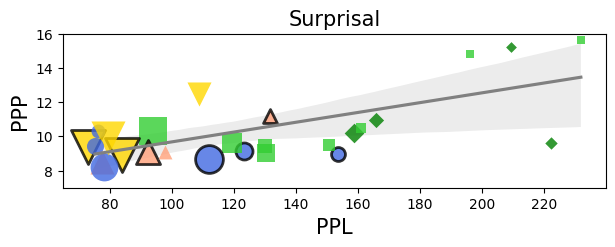

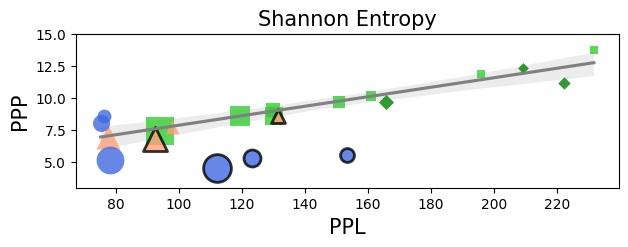

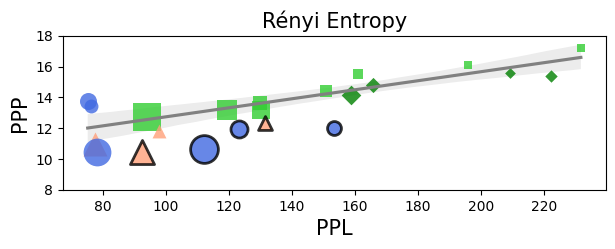

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 2))
sns.regplot(df[df["instruction"]==""], x='perplexity', y="surprisal_loglik", scatter=False, line_kws={"color": "gray"})
for i in range(len(df)):
    plt.scatter(x=df['perplexity'].iloc[i],
                 y=df['surprisal_loglik'].iloc[i], 
                 color=model2color[df["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df["model"].iloc[i]]), 
                 linewidths=model2line[df["model"].iloc[i]], 
                 marker=model2shape[df["model"].iloc[i]],
                 edgecolors="black")
# Label the axes
plt.ylim(7, 16)
plt.xlabel('PPL', fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.title('Surprisal', fontsize=15)
plt.savefig("DC_surprisal.pdf", bbox_inches='tight')

plt.figure(figsize=(7, 2))
df_sub = df[df["entropy_loglik"] > 0]
sns.regplot(df_sub[df_sub["instruction"]==""], x='perplexity', y="entropy_loglik", scatter=False, line_kws={"color": "gray"})
for i in range(len(df_sub)):
    plt.scatter(x=df_sub['perplexity'].iloc[i],
                 y=df_sub['entropy_loglik'].iloc[i], 
                 color=model2color[df_sub["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_sub["model"].iloc[i]]), 
                 linewidths=model2line[df_sub["model"].iloc[i]], 
                 marker=model2shape[df_sub["model"].iloc[i]],
                 edgecolors="black")
    
plt.ylim(3, 15)
plt.xlabel('PPL', fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.title('Shannon Entropy', fontsize=15)
plt.savefig("DC_entropy.pdf", bbox_inches='tight')

plt.figure(figsize=(7, 2))
df_sub = df[df["renyi_loglik"] > 0]
sns.regplot(df_sub[df_sub["instruction"]==""], x='perplexity', y="renyi_loglik", scatter=False, line_kws={"color": "gray"})
for i in range(len(df_sub)):
    plt.scatter(x=df_sub['perplexity'].iloc[i],
                 y=df_sub['renyi_loglik'].iloc[i], 
                 color=model2color[df_sub["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_sub["model"].iloc[i]]), 
                 linewidths=model2line[df_sub["model"].iloc[i]], 
                 marker=model2shape[df_sub["model"].iloc[i]],
                 edgecolors="black")
plt.ylim(8, 18)
plt.xlabel('PPL', fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.title('Rényi Entropy', fontsize=15)

plt.margins(x=None, y=None)
plt.savefig("DC_renyi.pdf", bbox_inches='tight')
plt.show()

In [4]:
from scipy.stats import pearsonr
print(pearsonr(df[(df["instruction"]=="")][["perplexity"]].values.flatten(), df[(df["instruction"]=="")][["surprisal_loglik"]].values.flatten()))
print(pearsonr(df[(df["instruction"]=="")][["perplexity"]].values.flatten(), df[(df["instruction"]=="")][["entropy_loglik"]].values.flatten()))
print(pearsonr(df[(df["instruction"]=="")][["perplexity"]].values.flatten(), df[(df["instruction"]=="")][["renyi_loglik"]].values.flatten()))

PearsonRResult(statistic=0.6731397358348533, pvalue=0.0015844510971226682)
PearsonRResult(statistic=0.5793568894696361, pvalue=0.009334134876217155)
PearsonRResult(statistic=0.5548079076841518, pvalue=0.013682097421185969)


In [5]:
import statsmodels.api as sm

# above of below PPL-PPP relationship

keys = ["surprisal_loglik", "entropy_loglik", "renyi_loglik"]
for key in keys: 
    print(key)
    y = df[(df["instruction"]=="") & (df[key]>0)][[key]].values.flatten()
    x = df[(df["instruction"]=="") & (df[key]>0)][["perplexity"]].values.flatten()
    x = sm.add_constant(x)
    mod_baseline = sm.OLS(y, x)
    mod_baseline = mod_baseline.fit()
    a_0 = mod_baseline.params[0]
    a_1 = mod_baseline.params[1]

    y_target = df[(df["instruction"]!="")][[key]].values.flatten()
    x_target = df[(df["instruction"]!="")][["perplexity"]].values.flatten()
    for x_t, y_t in zip(x_target, y_target):
        if y_t > 0:
            y_estimate = a_0 + a_1 * x_t
            print(y_t < y_estimate)

surprisal_loglik
False
True
True
True
True
False
True
entropy_loglik
True
True
True
True
True
renyi_loglik
True
True
True
True
True


In [6]:
# Table 1

for line in df.reindex(model_order)[["name", "instruction", "surprisal_loglik", "entropy_loglik", "renyi_loglik", "perplexity"]].set_index("name").style.format(decimal='.', thousands='.', precision=2).to_latex().replace("0.00", "-").split("\n"):
    if line:
        print(" & ".join(line.split("&")))

\begin{tabular}{llrrrr}
  &  instruction  &  surprisal_loglik  &  entropy_loglik  &  renyi_loglik  &  perplexity \\
name  &    &    &    &    &   \\
Llama-2 7B  &    &  10.33  &  8.58  &  13.45  &  76.40 \\
Llama-2 7B  &  \checkmark  &  8.97  &  5.57  &  12.03  &  153.46 \\
Llama-2 13B  &    &  9.44  &  8.04  &  13.77  &  75.28 \\
Llama-2 13B  &  \checkmark  &  9.13  &  5.30  &  11.97  &  123.35 \\
Llama-2 70B  &    &  8.21  &  5.14  &  10.47  &  78.28 \\
Llama-2 70B  &  \checkmark  &  8.67  &  4.53  &  10.67  &  112.07 \\
Falcon 7B  &    &  9.08  &  7.75  &  11.81  &  97.86 \\
Falcon 7B  &  \checkmark  &  11.18  &  8.57  &  12.31  &  131.53 \\
Falcon 40B  &    &  8.53  &  6.93  &  10.99  &  77.72 \\
Falcon 40B  &  \checkmark  &  9.06  &  6.76  &  10.43  &  92.53 \\
OPT 125M  &    &  15.65  &  13.72  &  17.18  &  231.80 \\
OPT 350M  &    &  14.81  &  11.89  &  16.07  &  196.02 \\
OPT 1.3B  &    &  10.51  &  10.16  &  15.55  &  160.95 \\
OPT 2.7B  &    &  9.52  &  9.65  &  14.38  &  150

## prompt

In [3]:
prompt_all = [
    "Please complete the following sentence using the simplest vocabulary possible",
    "Please complete the following sentence with a careful focus on word choice",
    "Please complete the following sentence using the most difficult vocabulary possible",
    "Please complete the following sentence to make it as grammatically simple as possible",
    "Please complete the following sentence with a careful focus on grammar",
    "Please complete the following sentence to make it as grammatically complex as possible",
    "Please complete the following sentence in a human-like manner. It has been reported that human ability to predict next words is weaker than language models and that humans often make noisy predictions, such as careless grammatical errors",
    "Please complete the following sentence. We are trying to reproduce human reading times with the word prediction probabilities you calculate, so please predict the next word like a human. It has been reported that human ability to predict next words is weaker than language models and that humans often make noisy predictions, such as careless grammatical errors",
    "Please complete the following sentence",
    '[INST] Please generate a grammatically simple sentence as much as possible. [/INST]  Answer',
    '[INST] Please generate a sentence with a careful focus on grammar. [/INST]  Answer',
    '[INST] Please generate a grammatically complex sentence as much as possible. [/INST]  Answer',
    '[INST] Please generate a sentence using the simplest vocabulary possible. [/INST]  Answer',
    '[INST] Please generate a sentence with a careful focus on word choice. [/INST]  Answer',
    '[INST] Please generate a sentence using the most difficult vocabulary possible. [/INST]  Answer',
    '[INST] Please generate a sentence in a human-like manner. It has been reported that human ability to predict next words is weaker than language models and that humans often make noisy predictions, such as careless grammatical errors. [/INST]  Answer',
    '[INST] Please generate a sentence. We are trying to reproduce human reading times with the word prediction probabilities you calculate, so please predict the next word like a human. It has been reported that human ability to predict next words is weaker than language models and that humans often make noisy predictions, such as careless grammatical errors. [/INST]  Answer',
    '[INST] Please generate a sentence. [/INST]  Answer',
 ]

old2new = {
    "Please complete the following sentence to make it as grammatically simple as possible": '[INST] Please generate a grammatically simple sentence as much as possible. [/INST]  Answer',
    "Please complete the following sentence with a careful focus on grammar": '[INST] Please generate a sentence with a careful focus on grammar. [/INST]  Answer',
    "Please complete the following sentence to make it as grammatically complex as possible": '[INST] Please generate a grammatically complex sentence as much as possible. [/INST]  Answer',
    "Please complete the following sentence using the simplest vocabulary possible": '[INST] Please generate a sentence using the simplest vocabulary possible. [/INST]  Answer',
    "Please complete the following sentence with a careful focus on word choice":  '[INST] Please generate a sentence with a careful focus on word choice. [/INST]  Answer',
    "Please complete the following sentence using the most difficult vocabulary possible": '[INST] Please generate a sentence using the most difficult vocabulary possible. [/INST]  Answer',
    "Please complete the following sentence in a human-like manner. It has been reported that human ability to predict next words is weaker than language models and that humans often make noisy predictions, such as careless grammatical errors": '[INST] Please generate a sentence in a human-like manner. It has been reported that human ability to predict next words is weaker than language models and that humans often make noisy predictions, such as careless grammatical errors. [/INST]  Answer',
    "Please complete the following sentence. We are trying to reproduce human reading times with the word prediction probabilities you calculate, so please predict the next word like a human. It has been reported that human ability to predict next words is weaker than language models and that humans often make noisy predictions, such as careless grammatical errors": '[INST] Please generate a sentence. We are trying to reproduce human reading times with the word prediction probabilities you calculate, so please predict the next word like a human. It has been reported that human ability to predict next words is weaker than language models and that humans often make noisy predictions, such as careless grammatical errors. [/INST]  Answer',
    "Please complete the following sentence": '[INST] Please generate a sentence. [/INST]  Answer',
}

prompt_old = old2new.keys()
prompt_new = old2new.values()
new2old = {v:k for k,v in old2new.items()}

In [4]:
import glob
import os
import pandas as pd
import numpy as np

df = pd.DataFrame(columns=["model", "prompt", "surprisal_loglik", "entropy_loglik", "renyi_loglik", "perplexity"])
files = glob.glob("../results/DC/*/*/surprisal.json.result")
for file in files:
    if len(file.split("/")) == 5:
        continue
    *_, model, _, _ = file.split("/")
    prompt = open(os.path.join(os.path.dirname(file), "prompt.json")).read().strip('"').strip("\\n").strip(" ").strip(":").strip(".")
    if prompt not in prompt_all:
        continue
    with open(file) as f:
        for line in f:
            if line.startswith("delta loglik per tokens:"):
                loglik = float(line.split()[-1])
            if line.startswith("perplexity:"):
                perplexity = float(line.split()[-1])
    df.loc[len(df.index)] = [model, prompt, loglik, 0, 0, perplexity]

files = glob.glob("../results/DC/*/*/entropy.json.result")
for file in files:
    if len(file.split("/")) == 5:
        continue
    *_, model,_, _ = file.split("/")
    prompt = open(os.path.join(os.path.dirname(file), "prompt.json")).read().strip('"').strip("\\n").strip(" ").strip(":").strip(".")
    if prompt not in prompt_all:
        continue
    with open(file) as f:
        for line in f:
            if line.startswith("delta loglik per tokens:"):
                loglik = float(line.split()[-1])
                break
    df.loc[(df["model"]==model) & (df["prompt"]==prompt), "entropy_loglik"] = loglik

files = glob.glob("../results/DC/*/*/renyi-entropy.json.result")
for file in files:
    if len(file.split("/")) == 5:
        continue
    *_, model, _, _ = file.split("/")
    prompt = open(os.path.join(os.path.dirname(file), "prompt.json")).read().strip('"').strip("\\n").strip(" ").strip(":").strip(".")
    if prompt not in prompt_all:
        continue
    with open(file) as f:
        for line in f:
            if line.startswith("delta loglik per tokens:"):
                loglik = float(line.split()[-1])
                break
    df.loc[(df["model"]==model) & (df["prompt"]==prompt), "renyi_loglik"] = loglik

df["name"] = df["model"].apply(lambda x: model2name[x] if x in model2name else x)
df["surprisal_loglik"] = df["surprisal_loglik"]*1000
df["entropy_loglik"] = df["entropy_loglik"]*1000
df["renyi_loglik"] = df["renyi_loglik"]*1000

df_summarize = df.copy()

# aggregate the prompt differences
for llama in ["Llama-2-7b-chat-hf", "Llama-2-13b-chat-hf", "Llama-2-70b-chat-hf",]:
    for prompt in prompt_old:
        df_summarize.loc[(df_summarize["model"]==llama) & (df_summarize["prompt"]==prompt), "surprisal_loglik"] = df_summarize.loc[(df_summarize["model"]==llama) & (df_summarize["prompt"]==old2new[prompt].replace("\n\n", "\\n\\n")), "surprisal_loglik"].mean()
        df_summarize.loc[(df_summarize["model"]==llama) & (df_summarize["prompt"]==prompt), "entropy_loglik"] = df_summarize.loc[(df_summarize["model"]==llama) & (df_summarize["prompt"]==old2new[prompt].replace("\n\n", "\\n\\n")), "entropy_loglik"].mean()
        df_summarize.loc[(df_summarize["model"]==llama) & (df_summarize["prompt"]==prompt), "renyi_loglik"] = df_summarize.loc[(df_summarize["model"]==llama) & (df_summarize["prompt"]==old2new[prompt].replace("\n\n", "\\n\\n")), "renyi_loglik"].mean()
        df_summarize.loc[(df_summarize["model"]==llama) & (df_summarize["prompt"]==prompt), "perplexity"] = df_summarize.loc[(df_summarize["model"]==llama) & (df_summarize["prompt"]==old2new[prompt].replace("\n\n", "\\n\\n")), "perplexity"].mean()
df_summarize = df_summarize[df_summarize["prompt"].apply(lambda x: x in prompt_old)]
df_summarize = df_summarize.replace(0, np.NaN)

In [76]:
## Table 2
it_models = ["Llama-2-7b-chat-hf", "Llama-2-13b-chat-hf", "Llama-2-70b-chat-hf", "falcon-7b-instruct", "falcon-40b-instruct", "text-davinci-002", "text-davinci-003"]
it_model_groups = ["Llama", "falcon", "davinci"]
metrics = ["surprisal_loglik", "entropy_loglik", "renyi_loglik"]
for prompt in prompt_old:
    # print(prompt, end= "")
    for metric in metrics:
        # print(metric)
        for model in it_model_groups:
            # print(model)
            score = df_summarize[(df_summarize["prompt"]==prompt) & (df_summarize["model"].apply(lambda x: model in x))][metric].mean()
            if score > 0:
                print(" & {:,.2f}".format(score), end="")
    print()

 & 8.20 & 9.73 & 6.20 & 5.94 & 9.77 & 12.30 & 12.69
 & 8.63 & 9.46 & 6.56 & 5.56 & 9.52 & 11.94 & 12.40
 & 8.18 & 9.46 & 5.90 & 5.64 & 9.60 & 11.66 & 12.56
 & 7.93 & 9.49 & 5.92 & 6.33 & 9.74 & 12.39 & 12.63
 & 8.10 & 9.16 & 6.63 & 5.18 & 9.18 & 11.34 & 12.28
 & 7.79 & 8.81 & 5.77 & 5.34 & 9.29 & 11.44 & 12.34
 & 8.83 & 8.82 & 5.54 & 5.99 & 8.86 & 12.39 & 12.35
 & 8.90 & 9.16 & 5.95 & 6.53 & 9.13 & 13.11 & 12.42
 & 8.42 & 9.60 & 6.98 & 5.65 & 9.45 & 12.15 & 12.41


In [5]:
# # format 1

for prompt in prompt_old:
    print("\multirow{5}{10cm}{" + prompt.replace("\n\n", " ") + "} ")
    for line in df[df["prompt"].apply(lambda x: x.strip()==prompt)].sort_values(by="model", key=lambda x: x.apply(lambda y: model_order.index(y) if y in model_order else 100))[["name", "surprisal_loglik", "entropy_loglik", "renyi_loglik", "perplexity"]].reset_index(drop=True).style.format(decimal='.', thousands='.', precision=2).to_latex().replace(" & model & surprisal_loglik & entropy_loglik & renyi_loglik & perplexity \\\\","").replace("\\begin{tabular}{llrrrr}", "").replace("\end{tabular}", "").split("\n"):
        if "name" not in line and line:
            print("& " + "&".join(line.split("&")[1:]).replace("0.00", "-"))
    print("\cmidrule(){1-1} \cmidrule(l){2-2} \cmidrule(l){3-3} \cmidrule(l){4-4} \cmidrule(l){5-5} \cmidrule(l){6-6}")

\multirow{5}{10cm}{Please complete the following sentence to make it as grammatically simple as possible} 
&  Llama-2 7B & 9.10 & 9.15 & 15.58 & 341.90 \\
&  Llama-2 13B & 9.21 & 8.37 & 15.18 & 184.71 \\
&  Llama-2 70B & 9.03 & 6.63 & 12.82 & 139.97 \\
&  Falcon 7B & 10.54 & 10.60 & 13.20 & 153.40 \\
&  Falcon 40B & 8.91 & 8.93 & 12.18 & 106.49 \\
&  GPT-3.5 D2 & 6.20 & - & - & 524.09 \\
&  GPT-3.5 D3 & 6.20 & - & - & 429.86 \\
\cmidrule(){1-1} \cmidrule(l){2-2} \cmidrule(l){3-3} \cmidrule(l){4-4} \cmidrule(l){5-5} \cmidrule(l){6-6}
\multirow{5}{10cm}{Please complete the following sentence with a careful focus on grammar} 
&  Llama-2 7B & 9.29 & 9.07 & 15.15 & 250.90 \\
&  Llama-2 13B & 9.36 & 7.85 & 14.51 & 169.02 \\
&  Llama-2 70B & 9.25 & 6.62 & 12.71 & 152.12 \\
&  Falcon 7B & 10.02 & 10.48 & 13.10 & 168.28 \\
&  Falcon 40B & 8.90 & 8.55 & 11.70 & 103.18 \\
&  GPT-3.5 D2 & 6.51 & - & - & 620.67 \\
&  GPT-3.5 D3 & 6.61 & - & - & 331.92 \\
\cmidrule(){1-1} \cmidrule(l){2-2} \cmidrule

In [54]:
# format 2

for prompt in prompt_new:
    print("\multirow{5}{10cm}{" + prompt.replace("\n\n", " ") + "} ")
    for line in df[df["prompt"]==prompt].sort_values(by="model", key=lambda x: x.apply(lambda y: model_order.index(y) if y in model_order else 100))[["name", "surprisal_loglik", "entropy_loglik", "renyi_loglik", "perplexity"]].reset_index(drop=True).style.format(decimal='.', thousands='.', precision=2).to_latex().replace(" & model & surprisal_loglik & entropy_loglik & renyi_loglik & perplexity \\\\","").replace("\\begin{tabular}{llrrrr}", "").replace("\end{tabular}", "").split("\n"):
        if "name" not in line and line:
            print("& " + "&".join(line.split("&")[1:]).replace("0.00", "-").replace("\n\n", " "))
    print("\cmidrule(){1-1} \cmidrule(l){2-2} \cmidrule(l){3-3} \cmidrule(l){4-4} \cmidrule(l){5-5} \cmidrule(l){6-6}")

\multirow{5}{10cm}{[INST] Please generate a grammatically simple sentence as much as possible. [/INST]  Answer} 
&  Llama-2 7B & 8.88 & 7.07 & 13.72 & 325.44 \\
&  Llama-2 13B & 8.35 & 6.08 & 12.58 & 373.04 \\
&  Llama-2 70B & 7.38 & 4.67 & 10.59 & 466.80 \\
\cmidrule(){1-1} \cmidrule(l){2-2} \cmidrule(l){3-3} \cmidrule(l){4-4} \cmidrule(l){5-5} \cmidrule(l){6-6}
\multirow{5}{10cm}{[INST] Please generate a sentence with a careful focus on grammar. [/INST]  Answer} 
&  Llama-2 7B & 9.25 & 6.79 & 13.48 & 232.50 \\
&  Llama-2 13B & 8.59 & 5.75 & 12.21 & 307.64 \\
&  Llama-2 70B & 8.05 & 4.15 & 10.13 & 345.80 \\
\cmidrule(){1-1} \cmidrule(l){2-2} \cmidrule(l){3-3} \cmidrule(l){4-4} \cmidrule(l){5-5} \cmidrule(l){6-6}
\multirow{5}{10cm}{[INST] Please generate a grammatically complex sentence as much as possible. [/INST]  Answer} 
&  Llama-2 7B & 8.59 & 6.32 & 12.41 & 312.61 \\
&  Llama-2 13B & 8.35 & 5.68 & 11.94 & 329.54 \\
&  Llama-2 70B & 7.58 & 4.92 & 10.63 & 396.32 \\
\cmidrule(){1-1} 

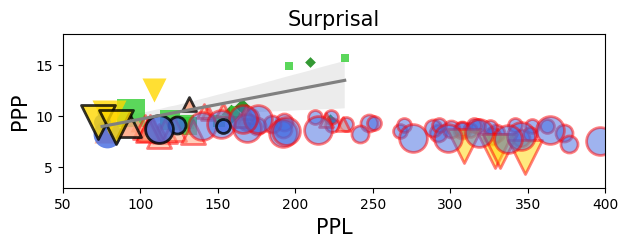

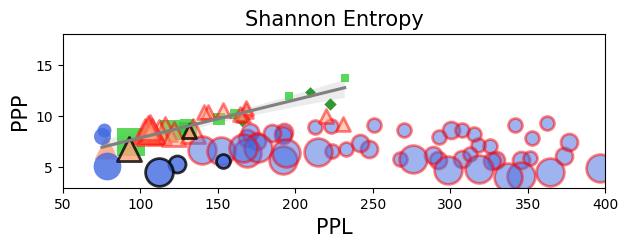

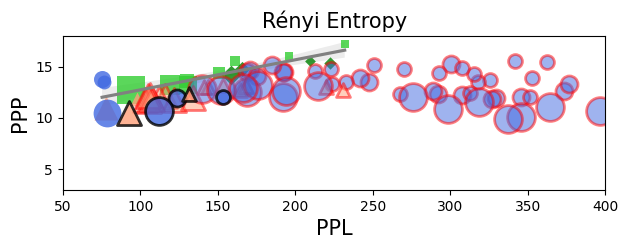

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 2))
df_noinst = df_all[df_all["instruction"]==""]
df_inst = df_all[df_all["instruction"]!=""]
sns.regplot(df_noinst, x='perplexity', y="surprisal_loglik", scatter=False, line_kws={"color": "gray"})


for i in range(len(df_noinst)):
    plt.scatter(x=df_noinst['perplexity'].iloc[i],
                 y=df_noinst['surprisal_loglik'].iloc[i], 
                 color=model2color[df_noinst["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_noinst["model"].iloc[i]]), 
                 linewidths=model2line[df_noinst["model"].iloc[i]], 
                 marker=model2shape[df_noinst["model"].iloc[i]],
                 edgecolors="black")

for i in range(len(df)):
    plt.scatter(x=df['perplexity'].iloc[i],
                 y=df['surprisal_loglik'].iloc[i], 
                 color=model2color[df["model"].iloc[i]], 
                 alpha=0.5, 
                 s=int(model2size[df["model"].iloc[i]]), 
                 linewidths=model2line[df["model"].iloc[i]], 
                 marker=model2shape[df["model"].iloc[i]],
                 edgecolors="red")
    
for i in range(len(df_inst)):
    plt.scatter(x=df_inst['perplexity'].iloc[i],
                    y=df_inst['surprisal_loglik'].iloc[i], 
                    color=model2color[df_inst["model"].iloc[i]], 
                    alpha=0.8, 
                    s=int(model2size[df_inst["model"].iloc[i]]), 
                    linewidths=model2line[df_inst["model"].iloc[i]], 
                    marker=model2shape[df_inst["model"].iloc[i]],
                    edgecolors="black")
    
# Label the axes
plt.xlim(50, 400)
plt.ylim(3, 18)
plt.xlabel('PPL', fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.title('Surprisal', fontsize=15)
plt.savefig("DC_surprisal_prompt.pdf", bbox_inches='tight')

plt.figure(figsize=(7, 2))
df_noinst = df_all[(df_all["instruction"]=="") & (df_all["entropy_loglik"] > 0)]
df_inst = df_all[(df_all["instruction"]!="") & (df_all["entropy_loglik"] > 0)]
sns.regplot(df_noinst, x='perplexity', y="entropy_loglik", scatter=False, line_kws={"color": "gray"})

for i in range(len(df_noinst)):
    plt.scatter(x=df_noinst['perplexity'].iloc[i],
                 y=df_noinst['entropy_loglik'].iloc[i], 
                 color=model2color[df_noinst["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_noinst["model"].iloc[i]]), 
                 linewidths=model2line[df_noinst["model"].iloc[i]], 
                 marker=model2shape[df_noinst["model"].iloc[i]],
                 edgecolors="black")

df_sub = df[df["entropy_loglik"] > 0]
for i in range(len(df_sub)):
    plt.scatter(x=df_sub['perplexity'].iloc[i],
                 y=df_sub['entropy_loglik'].iloc[i], 
                 color=model2color[df_sub["model"].iloc[i]], 
                 alpha=0.5, 
                 s=int(model2size[df_sub["model"].iloc[i]]), 
                 linewidths=model2line[df_sub["model"].iloc[i]], 
                 marker=model2shape[df_sub["model"].iloc[i]],
                 edgecolors="red")
    
for i in range(len(df_inst)):
    plt.scatter(x=df_inst['perplexity'].iloc[i],
                    y=df_inst['entropy_loglik'].iloc[i], 
                    color=model2color[df_inst["model"].iloc[i]], 
                    alpha=0.8, 
                    s=int(model2size[df_inst["model"].iloc[i]]), 
                    linewidths=model2line[df_inst["model"].iloc[i]], 
                    marker=model2shape[df_inst["model"].iloc[i]],
                    edgecolors="black")


plt.xlim(50, 400)
plt.ylim(3, 18)
plt.xlabel('PPL', fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.title('Shannon Entropy', fontsize=15)
plt.savefig("DC_entropy_prompt.pdf", bbox_inches='tight')

plt.figure(figsize=(7, 2))
df_noinst = df_all[(df_all["instruction"]=="") & (df_all["renyi_loglik"] > 0)]
df_inst = df_all[(df_all["instruction"]!="") & (df_all["renyi_loglik"] > 0)]
sns.regplot(df_noinst, x='perplexity', y="renyi_loglik", scatter=False, line_kws={"color": "gray"})


for i in range(len(df_noinst)):
    plt.scatter(x=df_noinst['perplexity'].iloc[i],
                 y=df_noinst['renyi_loglik'].iloc[i], 
                 color=model2color[df_noinst["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_noinst["model"].iloc[i]]), 
                 linewidths=model2line[df_noinst["model"].iloc[i]], 
                 marker=model2shape[df_noinst["model"].iloc[i]],
                 edgecolors="black")

df_sub = df[df["renyi_loglik"] > 0]
for i in range(len(df_sub)):
    plt.scatter(x=df_sub['perplexity'].iloc[i],
                 y=df_sub['renyi_loglik'].iloc[i], 
                 color=model2color[df_sub["model"].iloc[i]], 
                 alpha=0.5, 
                 s=int(model2size[df_sub["model"].iloc[i]]), 
                 linewidths=model2line[df_sub["model"].iloc[i]], 
                 marker=model2shape[df_sub["model"].iloc[i]],
                 edgecolors="red")

for i in range(len(df_inst)):
    plt.scatter(x=df_inst['perplexity'].iloc[i],
                    y=df_inst['renyi_loglik'].iloc[i], 
                    color=model2color[df_inst["model"].iloc[i]], 
                    alpha=0.8, 
                    s=int(model2size[df_inst["model"].iloc[i]]), 
                    linewidths=model2line[df_inst["model"].iloc[i]], 
                    marker=model2shape[df_inst["model"].iloc[i]],
                    edgecolors="black")
    
plt.xlim(50, 400)
plt.ylim(3, 18)
plt.xlabel('PPL', fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.title('Rényi Entropy', fontsize=15)

plt.margins(x=None, y=None)
plt.savefig("DC_renyi_prompt.pdf", bbox_inches='tight')
plt.show()

In [73]:
import statsmodels.api as sm
keys = ["surprisal_loglik", "entropy_loglik", "renyi_loglik"]
binoms = []
for key in keys: 
    print(key)
    y = df_all[(df_all["instruction"]=="") & (df_all[key]>0)][[key]].values.flatten()
    x = df_all[(df_all["instruction"]=="") & (df_all[key]>0)][["perplexity"]].values.flatten()
    x = sm.add_constant(x)
    mod_baseline = sm.OLS(y, x)
    mod_baseline = mod_baseline.fit()
    a_0 = mod_baseline.params[0]
    a_1 = mod_baseline.params[1]

    y_target = df[key].values.flatten()
    x_target = df["perplexity"].values.flatten()
    for x_t, y_t in zip(x_target, y_target):
        if y_t > 0:
            y_estimate = a_0 + a_1 * x_t
            binoms.append(y_t < y_estimate)

print(sum(binoms))
print(len(binoms))

surprisal_loglik
entropy_loglik
renyi_loglik
222
234


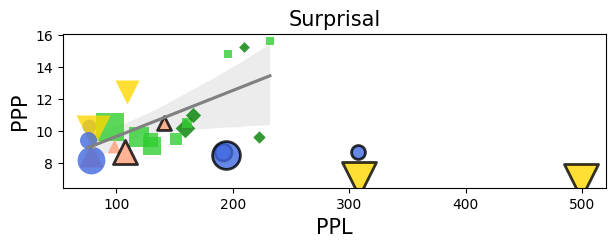

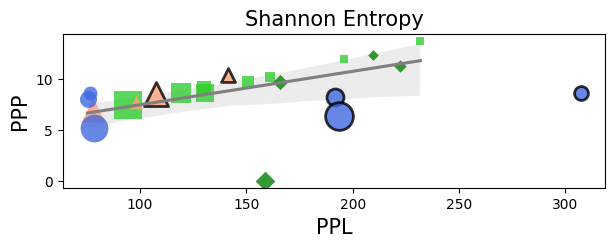

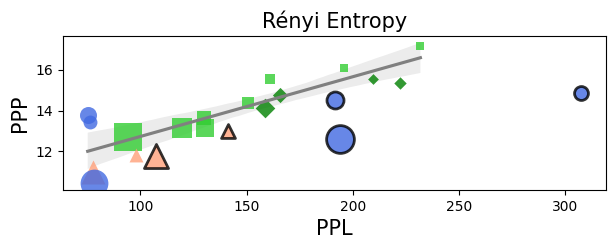

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(7, 2))
df_noinst = df_all[df_all["instruction"]==""]
sns.regplot(df_noinst, x='perplexity', y="surprisal_loglik", scatter=False, line_kws={"color": "gray"})
for i in range(len(df_noinst)):
    plt.scatter(x=df_noinst['perplexity'].iloc[i],
                 y=df_noinst['surprisal_loglik'].iloc[i], 
                 color=model2color[df_noinst["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_noinst["model"].iloc[i]]), 
                 linewidths=model2line[df_noinst["model"].iloc[i]], 
                 marker=model2shape[df_noinst["model"].iloc[i]],
                 edgecolors="black")

df_target = df[df["prompt"]=="Please complete the following sentence"]
for i in range(len(df_target)):
    plt.scatter(x=df_target['perplexity'].iloc[i],
                 y=df_target['surprisal_loglik'].iloc[i], 
                 color=model2color[df_target["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_target["model"].iloc[i]]), 
                 linewidths=model2line[df_target["model"].iloc[i]], 
                 marker=model2shape[df_target["model"].iloc[i]],
                 edgecolors="black")

# Label the axes
# plt.ylim(3, 18)
# plt.xlim(50, 250)
plt.xlabel('PPL', fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.title('Surprisal', fontsize=15)
plt.savefig("DC_surprisal_prompt_complete_only.pdf", bbox_inches='tight')

plt.figure(figsize=(7, 2))
df_noinst = df_all[(df_all["instruction"]=="") & (df_all["renyi_loglik"] > 0)]
sns.regplot(df_noinst, x='perplexity', y="entropy_loglik", scatter=False, line_kws={"color": "gray"})
for i in range(len(df_noinst)):
    plt.scatter(x=df_noinst['perplexity'].iloc[i],
                 y=df_noinst['entropy_loglik'].iloc[i], 
                 color=model2color[df_noinst["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_noinst["model"].iloc[i]]), 
                 linewidths=model2line[df_noinst["model"].iloc[i]], 
                 marker=model2shape[df_noinst["model"].iloc[i]],
                 edgecolors="black")

df_target = df[(df["prompt"]=="Please complete the following sentence") & (df["entropy_loglik"] > 0)]
for i in range(len(df_target)):
    plt.scatter(x=df_target['perplexity'].iloc[i],
                 y=df_target['entropy_loglik'].iloc[i], 
                 color=model2color[df_target["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_target["model"].iloc[i]]), 
                 linewidths=model2line[df_target["model"].iloc[i]], 
                 marker=model2shape[df_target["model"].iloc[i]],
                 edgecolors="black")
# plt.ylim(3, 18)
# plt.xlim(50, 250)
plt.xlabel('PPL', fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.title('Shannon Entropy', fontsize=15)
plt.savefig("DC_entropy_prompt_complete_only.pdf", bbox_inches='tight')

plt.figure(figsize=(7, 2))
df_noinst = df_all[(df_all["instruction"]=="") & (df_all["renyi_loglik"] > 0)]
sns.regplot(df_noinst, x='perplexity', y="renyi_loglik", scatter=False, line_kws={"color": "gray"})
for i in range(len(df_noinst)):
    plt.scatter(x=df_noinst['perplexity'].iloc[i],
                 y=df_noinst['renyi_loglik'].iloc[i], 
                 color=model2color[df_noinst["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_noinst["model"].iloc[i]]), 
                 linewidths=model2line[df_noinst["model"].iloc[i]], 
                 marker=model2shape[df_noinst["model"].iloc[i]],
                 edgecolors="black")

df_target = df[(df["prompt"]=="Please complete the following sentence") & (df["renyi_loglik"] > 0)]
for i in range(len(df_target)):
    plt.scatter(x=df_target['perplexity'].iloc[i],
                 y=df_target['renyi_loglik'].iloc[i], 
                 color=model2color[df_target["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_target["model"].iloc[i]]), 
                 linewidths=model2line[df_target["model"].iloc[i]], 
                 marker=model2shape[df_target["model"].iloc[i]],
                 edgecolors="black")
# plt.ylim(3, 18)
# plt.xlim(50, 250)
plt.xlabel('PPL', fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.title('Rényi Entropy', fontsize=15)

plt.margins(x=None, y=None)
plt.savefig("DC_renyi_prompt_complete_only.pdf", bbox_inches='tight')
plt.show()

## NS

In [6]:
import glob
import pandas as pd

df = pd.DataFrame(columns=["model", "surprisal_loglik", "entropy_loglik", "renyi_loglik", "perplexity"])
files = glob.glob("../results/NS/*/surprisal.json.result")
for file in files:
    if len(file.split("/")) == 6:
        continue
    *_, model, _ = file.split("/")
    if model not in model_order:
        continue

    with open(file) as f:
        for line in f:
            if line.startswith("delta loglik per tokens:"):
                loglik = float(line.split()[-1])
            if line.startswith("perplexity:"):
                perplexity = float(line.split()[-1])
    df.loc[len(df.index)] = [model, loglik, 0, 0, perplexity]

files = glob.glob("../results/NS/*/entropy.json.result")
for file in files:
    if len(file.split("/")) == 6:
        continue
    *_, model, _ = file.split("/")
    if model not in model_order:
        continue

    with open(file) as f:
        for line in f:
            if line.startswith("delta loglik per tokens:"):
                loglik = float(line.split()[-1])
                break
    df.loc[df["model"]==model, "entropy_loglik"] = loglik

files = glob.glob("../results/NS/*/renyi-entropy.json.result")
for file in files:
    if len(file.split("/")) == 6:
        continue
    *_, model, _ = file.split("/")
    if model not in model_order:
        continue

    with open(file) as f:
        for line in f:
            if line.startswith("delta loglik per tokens:"):
                loglik = float(line.split()[-1])
                break
    df.loc[df["model"]==model, "renyi_loglik"] = loglik

df.index = df["model"]
df["name"] = df["model"].apply(lambda x: model2name[x] if x in model2name else x)
df["instruction"] = df["model"].apply(lambda x: model2instruction[x] if x in model2instruction else False)
df["instruction"] = df["instruction"].apply(lambda x: "\checkmark" if x else "")
df["surprisal_loglik"] = df["surprisal_loglik"]*1000
df["entropy_loglik"] = df["entropy_loglik"]*1000
df["renyi_loglik"] = df["renyi_loglik"]*1000
df = df[df['model'].apply(lambda x: not x.startswith("gpt-3.5"))]

df_all = df.copy()

In [84]:
df_inst = df_all[df_all["instruction"]!=""]
for metric in metrics:
    # print(metric)
    for model in it_model_groups:
        # print(model)
        score = df_inst[(df_inst["model"].apply(lambda x: model in x))][metric].mean()
        if score > 0:
            print(" & {:,.2f}".format(score), end="")
print()

 & 6.20 & 7.02 & 5.56 & 2.05 & 3.63 & 7.73 & 10.56


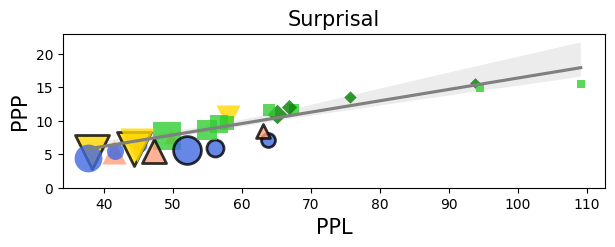

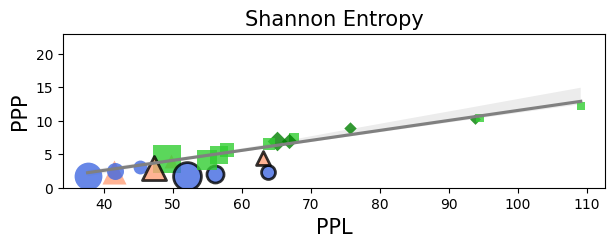

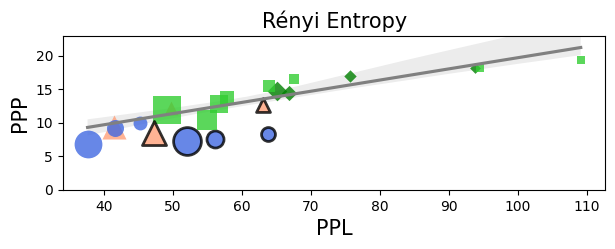

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 2))
sns.regplot(df[df["instruction"]==""], x='perplexity', y="surprisal_loglik", scatter=False, line_kws={"color": "gray"})
for i in range(len(df)):
    plt.scatter(x=df['perplexity'].iloc[i],
                 y=df['surprisal_loglik'].iloc[i], 
                 color=model2color[df["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df["model"].iloc[i]]), 
                 linewidths=model2line[df["model"].iloc[i]], 
                 marker=model2shape[df["model"].iloc[i]],
                 edgecolors="black")
# Label the axes
plt.ylim(0, 23)
plt.xlabel('PPL', fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.title('Surprisal', fontsize=15)
plt.savefig("NS_surprisal.pdf", bbox_inches='tight')

plt.figure(figsize=(7, 2))
df_sub = df[df["entropy_loglik"] > 0]
sns.regplot(df_sub[df_sub["instruction"]==""], x='perplexity', y="entropy_loglik", scatter=False, line_kws={"color": "gray"})
for i in range(len(df_sub)):
    plt.scatter(x=df_sub['perplexity'].iloc[i],
                 y=df_sub['entropy_loglik'].iloc[i], 
                 color=model2color[df_sub["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_sub["model"].iloc[i]]), 
                 linewidths=model2line[df_sub["model"].iloc[i]], 
                 marker=model2shape[df_sub["model"].iloc[i]],
                 edgecolors="black")
plt.ylim(0, 23)
plt.xlabel('PPL', fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.title('Shannon Entropy', fontsize=15)
plt.savefig("NS_entropy.pdf", bbox_inches='tight')

plt.figure(figsize=(7, 2))
df_sub = df[df["renyi_loglik"] > 0]
sns.regplot(df_sub[df_sub["instruction"]==""], x='perplexity', y="renyi_loglik", scatter=False, line_kws={"color": "gray"})
for i in range(len(df_sub)):
    plt.scatter(x=df_sub['perplexity'].iloc[i],
                 y=df_sub['renyi_loglik'].iloc[i], 
                 color=model2color[df_sub["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_sub["model"].iloc[i]]), 
                 linewidths=model2line[df_sub["model"].iloc[i]], 
                 marker=model2shape[df_sub["model"].iloc[i]],
                 edgecolors="black")
    
plt.ylim(0, 23)
plt.xlabel('PPL', fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.title('Rényi Entropy', fontsize=15)

plt.margins(x=None, y=None)
plt.savefig("NS_renyi.pdf", bbox_inches='tight')
plt.show()

In [20]:
from scipy.stats import pearsonr
print(pearsonr(df[(df["instruction"]=="")][["perplexity"]].values.flatten(), df[(df["instruction"]=="")][["surprisal_loglik"]].values.flatten()))
print(pearsonr(df[(df["instruction"]=="")][["perplexity"]].values.flatten(), df[(df["instruction"]=="")][["entropy_loglik"]].values.flatten()))
print(pearsonr(df[(df["instruction"]=="")][["perplexity"]].values.flatten(), df[(df["instruction"]=="")][["renyi_loglik"]].values.flatten()))

PearsonRResult(statistic=0.9546483250693356, pvalue=2.2564058488391743e-10)
PearsonRResult(statistic=0.9075743530338554, pvalue=8.147106935499856e-08)
PearsonRResult(statistic=0.7163920284528973, pvalue=0.0005595836719154925)


In [21]:
import statsmodels.api as sm
keys = ["surprisal_loglik", "entropy_loglik", "renyi_loglik"]

for key in keys: 
    print(key)
    y = df[(df["instruction"]=="") & (df[key]>0)][[key]].values.flatten()
    x = df[(df["instruction"]=="") & (df[key]>0)][["perplexity"]].values.flatten()
    x = sm.add_constant(x)
    mod_baseline = sm.OLS(y, x)
    mod_baseline = mod_baseline.fit()
    a_0 = mod_baseline.params[0]
    a_1 = mod_baseline.params[1]

    y_target = df[(df["instruction"]!="")][[key]].values.flatten()
    x_target = df[(df["instruction"]!="")][["perplexity"]].values.flatten()
    for x_t, y_t in zip(x_target, y_target):
        if y_t > 0:
            y_estimate = a_0 + a_1 * x_t
            print(y_t < y_estimate)

surprisal_loglik
True
True
True
True
True
True
True
entropy_loglik
True
True
True
True
True
renyi_loglik
True
True
True
True
True


In [22]:
## Statistical test including the results of DC and NS

from scipy import stats
stats.binom_test(32, n=34, p=0.5, alternative='two-sided')

/tmp/ipykernel_362115/3494938369.py:4: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(32, n=34, p=0.5, alternative='two-sided')


6.938353180885315e-08

In [23]:
for line in df.reindex(model_order)[["name", "instruction", "surprisal_loglik", "entropy_loglik", "renyi_loglik", "perplexity"]].set_index("name").style.format(decimal='.', thousands='.', precision=2).to_latex().replace("0.00", "-").split("\n"):
    if line:
        print(" & " + " & ".join(line.split("&")[2:]))

 & 
 &  surprisal_loglik  &  entropy_loglik  &  renyi_loglik  &  perplexity \\
 &    &    &    &   \\
 &  6.41  &  3.06  &  9.97  &  45.21 \\
 &  7.07  &  2.42  &  8.33  &  63.74 \\
 &  5.44  &  2.44  &  9.23  &  41.62 \\
 &  5.93  &  1.99  &  7.53  &  56.05 \\
 &  4.51  &  1.80  &  6.79  &  37.61 \\
 &  5.60  &  1.75  &  7.34  &  52.05 \\
 &  7.61  &  3.95  &  12.17  &  49.64 \\
 &  8.54  &  4.38  &  12.63  &  62.99 \\
 &  5.35  &  2.41  &  9.36  &  41.46 \\
 &  5.49  &  2.89  &  8.49  &  47.27 \\
 &  15.54  &  12.27  &  19.41  &  109.11 \\
 &  14.86  &  10.35  &  18.11  &  94.51 \\
 &  11.81  &  7.43  &  16.53  &  67.59 \\
 &  11.66  &  6.60  &  15.51  &  63.98 \\
 &  9.59  &  5.56  &  13.64  &  57.86 \\
 &  9.51  &  4.96  &  12.84  &  56.74 \\
 &  8.55  &  4.16  &  10.39  &  54.91 \\
 &  7.78  &  4.33  &  11.92  &  49.11 \\
 &  15.61  &  10.20  &  18.19  &  93.81 \\
 &  13.62  &  8.91  &  16.96  &  75.67 \\
 &  12.04  &  7.01  &  14.52  &  66.87 \\
 &  10.94  &  6.99  &  14.69  &  6

## Prompt

In [7]:
import glob
import os
import pandas as pd

df = pd.DataFrame(columns=["model", "prompt", "surprisal_loglik", "entropy_loglik", "renyi_loglik", "perplexity"])
files = glob.glob("../results/NS/*/*/surprisal.json.result")
for file in files:
    if len(file.split("/")) == 5:
        continue
    *_, model, _, _ = file.split("/")
    # prompt = open(os.path.join(os.path.dirname(file), "prompt.json")).read().strip('"').strip("\\n")
    prompt = open(os.path.join(os.path.dirname(file), "prompt.json")).read().strip('"').strip("\\n").strip(" ").strip(":").strip(".")
    if prompt not in prompt_all:
        continue
    with open(file) as f:
        for line in f:
            if line.startswith("delta loglik per tokens:"):
                loglik = float(line.split()[-1])
            if line.startswith("perplexity:"):
                perplexity = float(line.split()[-1])
    df.loc[len(df.index)] = [model, prompt, loglik, 0, 0, perplexity]

files = glob.glob("../results/NS/*/*/entropy.json.result")
for file in files:
    if len(file.split("/")) == 5:
        continue
    *_, model,_, _ = file.split("/")
    prompt = open(os.path.join(os.path.dirname(file), "prompt.json")).read().strip('"').strip("\\n").strip(" ").strip(":").strip(".")
    with open(file) as f:
        for line in f:
            if line.startswith("delta loglik per tokens:"):
                loglik = float(line.split()[-1])
                break
    df.loc[(df["model"]==model) & (df["prompt"]==prompt), "entropy_loglik"] = loglik

files = glob.glob("../results/NS/*/*/renyi-entropy.json.result")
for file in files:
    if len(file.split("/")) == 5:
        continue
    *_, model, _, _ = file.split("/")
    prompt = open(os.path.join(os.path.dirname(file), "prompt.json")).read().strip('"').strip("\\n").strip(" ").strip(":").strip(".")

    with open(file) as f:
        for line in f:
            if line.startswith("delta loglik per tokens:"):
                loglik = float(line.split()[-1])
                break
    df.loc[(df["model"]==model) & (df["prompt"]==prompt), "renyi_loglik"] = loglik

df["name"] = df["model"].apply(lambda x: model2name[x] if x in model2name else x)
df["surprisal_loglik"] = df["surprisal_loglik"]*1000
df["entropy_loglik"] = df["entropy_loglik"]*1000
df["renyi_loglik"] = df["renyi_loglik"]*1000

# df_old = df[df["prompt"].apply(lambda x: x in prompt_old)]
# df = df[df["prompt"].apply(lambda x: x in prompt_new)]

df_summarize = df.copy()
for llama in ["Llama-2-7b-chat-hf", "Llama-2-13b-chat-hf", "Llama-2-70b-chat-hf",]:
    for prompt in prompt_old:
        df_summarize.loc[(df_summarize["model"]==llama) & (df_summarize["prompt"]==prompt), "surprisal_loglik"] = df_summarize.loc[(df_summarize["model"]==llama) & (df_summarize["prompt"]==old2new[prompt].replace("\n\n", "\\n\\n")), "surprisal_loglik"].mean()
        df_summarize.loc[(df_summarize["model"]==llama) & (df_summarize["prompt"]==prompt), "entropy_loglik"] = df_summarize.loc[(df_summarize["model"]==llama) & (df_summarize["prompt"]==old2new[prompt].replace("\n\n", "\\n\\n")), "entropy_loglik"].mean()
        df_summarize.loc[(df_summarize["model"]==llama) & (df_summarize["prompt"]==prompt), "renyi_loglik"] = df_summarize.loc[(df_summarize["model"]==llama) & (df_summarize["prompt"]==old2new[prompt].replace("\n\n", "\\n\\n")), "renyi_loglik"].mean()
        df_summarize.loc[(df_summarize["model"]==llama) & (df_summarize["prompt"]==prompt), "perplexity"] = df_summarize.loc[(df_summarize["model"]==llama) & (df_summarize["prompt"]==old2new[prompt].replace("\n\n", "\\n\\n")), "perplexity"].mean()
df_summarize = df_summarize[df_summarize["prompt"].apply(lambda x: x in prompt_old)]
df_summarize = df_summarize.replace(0, np.NaN)

In [78]:
it_models = ["Llama-2-7b-chat-hf", "Llama-2-13b-chat-hf", "Llama-2-70b-chat-hf", "falcon-7b-instruct", "falcon-40b-instruct", "text-davinci-002", "text-davinci-003"]
it_model_groups = ["Llama", "falcon", "davinci"]
metrics = ["surprisal_loglik", "entropy_loglik", "renyi_loglik"]
for prompt in prompt_old:
    # print(prompt, end= "")
    for metric in metrics:
        # print(metric)
        for model in it_model_groups:
            # print(model)
            score = df_summarize[(df_summarize["prompt"]==prompt) & (df_summarize["model"].apply(lambda x: model in x))][metric].mean()
            if score > 0:
                print(" & {:,.2f}".format(score), end="")
    print()

 & 3.84 & 7.38 & 5.83 & 2.57 & 4.60 & 8.78 & 13.30
 & 4.34 & 7.46 & 5.23 & 1.88 & 4.63 & 7.14 & 13.01
 & 4.64 & 7.10 & 4.07 & 1.31 & 4.09 & 6.38 & 12.35
 & 3.61 & 6.77 & 4.79 & 2.00 & 4.74 & 8.34 & 13.26
 & 3.79 & 7.30 & 5.30 & 1.37 & 4.21 & 6.36 & 12.75
 & 3.66 & 6.01 & 3.88 & 1.12 & 3.65 & 6.00 & 11.53
 & 4.29 & 5.46 & 2.95 & 2.61 & 4.73 & 9.64 & 13.42
 & 4.76 & 5.99 & 3.23 & 2.64 & 5.14 & 9.43 & 13.54
 & 4.94 & 7.13 & 4.69 & 1.94 & 5.01 & 7.82 & 13.52


In [8]:
# # format 1

for prompt in prompt_old:
    print("\multirow{5}{10cm}{" + prompt.replace("\n\n", " ") + "} ")
    for line in df[df["prompt"]==prompt].sort_values(by="model", key=lambda x: x.apply(lambda y: model_order.index(y) if y in model_order else 100))[["name", "surprisal_loglik", "entropy_loglik", "renyi_loglik", "perplexity"]].reset_index(drop=True).style.format(decimal='.', thousands='.', precision=2).to_latex().replace(" & model & surprisal_loglik & entropy_loglik & renyi_loglik & perplexity \\\\","").replace("\\begin{tabular}{llrrrr}", "").replace("\end{tabular}", "").split("\n"):
        if "name" not in line and line:
            print("& " + "&".join(line.split("&")[1:]).replace("0.00", "-"))
    print("\cmidrule(){1-1} \cmidrule(l){2-2} \cmidrule(l){3-3} \cmidrule(l){4-4} \cmidrule(l){5-5} \cmidrule(l){6-6}")

\multirow{5}{10cm}{Please complete the following sentence to make it as grammatically simple as possible} 
&  Llama-2 7B & 7.60 & 3.88 & 11.22 & 149.88 \\
&  Llama-2 13B & 6.42 & 3.04 & 10.68 & 84.31 \\
&  Llama-2 70B & 5.63 & 1.19 & 7.61 & 64.20 \\
&  Falcon 7B & 8.74 & 6.20 & 16.48 & 69.38 \\
&  Falcon 40B & 6.03 & 2.99 & 10.11 & 50.95 \\
&  GPT-3.5 D2 & 4.97 & - & - & 201.88 \\
&  GPT-3.5 D3 & 6.69 & - & - & 155.32 \\
\cmidrule(){1-1} \cmidrule(l){2-2} \cmidrule(l){3-3} \cmidrule(l){4-4} \cmidrule(l){5-5} \cmidrule(l){6-6}
\multirow{5}{10cm}{Please complete the following sentence with a careful focus on grammar} 
&  Llama-2 7B & 6.48 & 3.61 & 10.64 & 117.67 \\
&  Llama-2 13B & 5.32 & 3.20 & 10.39 & 84.06 \\
&  Llama-2 70B & 4.88 & 2.29 & 9.65 & 74.86 \\
&  Falcon 7B & 9.05 & 6.32 & 16.20 & 73.42 \\
&  Falcon 40B & 5.87 & 2.93 & 9.82 & 50.45 \\
&  GPT-3.5 D2 & 4.57 & - & - & 238.15 \\
&  GPT-3.5 D3 & 5.88 & - & - & 106.68 \\
\cmidrule(){1-1} \cmidrule(l){2-2} \cmidrule(l){3-3} \cmidr

In [61]:
# format 2
for prompt in prompt_new:
    print("\multirow{5}{10cm}{" + prompt.replace("\n\n", " ") + "} ")
    for line in df[df["prompt"]==prompt].sort_values(by="model", key=lambda x: x.apply(lambda y: model_order.index(y) if y in model_order else 100))[["name", "surprisal_loglik", "entropy_loglik", "renyi_loglik", "perplexity"]].reset_index(drop=True).style.format(decimal='.', thousands='.', precision=2).to_latex().replace(" & model & surprisal_loglik & entropy_loglik & renyi_loglik & perplexity \\\\","").replace("\\begin{tabular}{llrrrr}", "").replace("\end{tabular}", "").split("\n"):
        if "name" not in line and line:
            print("& " + "&".join(line.split("&")[1:]).replace("0.00", "-"))
    print("\cmidrule(){1-1} \cmidrule(l){2-2} \cmidrule(l){3-3} \cmidrule(l){4-4} \cmidrule(l){5-5} \cmidrule(l){6-6}")

\multirow{5}{10cm}{[INST] Please generate a grammatically simple sentence as much as possible. [/INST]  Answer} 
&  Llama-2 7B & 4.60 & 3.04 & 9.35 & 146.17 \\
&  Llama-2 13B & 3.70 & 3.10 & 10.44 & 186.45 \\
&  Llama-2 70B & 3.22 & 1.57 & 6.55 & 193.25 \\
\cmidrule(){1-1} \cmidrule(l){2-2} \cmidrule(l){3-3} \cmidrule(l){4-4} \cmidrule(l){5-5} \cmidrule(l){6-6}
\multirow{5}{10cm}{[INST] Please generate a sentence with a careful focus on grammar. [/INST]  Answer} 
&  Llama-2 7B & 5.04 & 2.59 & 8.44 & 100.95 \\
&  Llama-2 13B & 3.88 & 2.19 & 7.92 & 128.30 \\
&  Llama-2 70B & 4.09 & 0.87 & 5.06 & 140.79 \\
\cmidrule(){1-1} \cmidrule(l){2-2} \cmidrule(l){3-3} \cmidrule(l){4-4} \cmidrule(l){5-5} \cmidrule(l){6-6}
\multirow{5}{10cm}{[INST] Please generate a grammatically complex sentence as much as possible. [/INST]  Answer} 
&  Llama-2 7B & 4.95 & 1.90 & 6.97 & 113.33 \\
&  Llama-2 13B & 4.72 & 1.28 & 7.07 & 115.80 \\
&  Llama-2 70B & 4.23 & 0.75 & 5.10 & 130.95 \\
\cmidrule(){1-1} \cmidrul

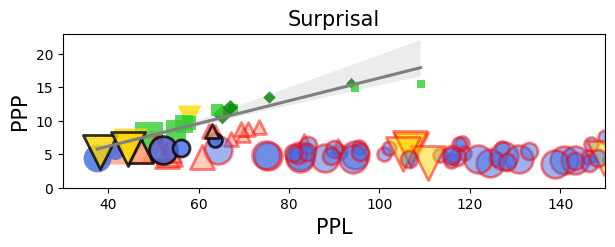

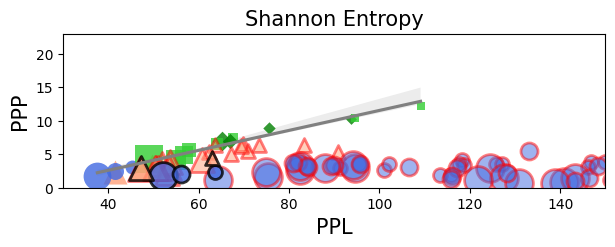

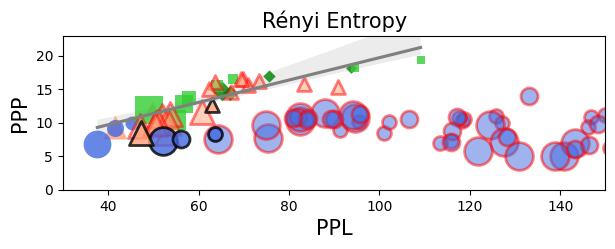

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# df = df[df["prompt"].isin(prompt_old)]

plt.figure(figsize=(7, 2))
df_noinst = df_all[df_all["instruction"]==""]
df_inst = df_all[df_all["instruction"]!=""]
sns.regplot(df_noinst, x='perplexity', y="surprisal_loglik", scatter=False, line_kws={"color": "gray"})


for i in range(len(df_noinst)):
    plt.scatter(x=df_noinst['perplexity'].iloc[i],
                 y=df_noinst['surprisal_loglik'].iloc[i], 
                 color=model2color[df_noinst["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_noinst["model"].iloc[i]]), 
                 linewidths=model2line[df_noinst["model"].iloc[i]], 
                 marker=model2shape[df_noinst["model"].iloc[i]],
                 edgecolors="black")

for i in range(len(df)):
    plt.scatter(x=df['perplexity'].iloc[i],
                 y=df['surprisal_loglik'].iloc[i], 
                 color=model2color[df["model"].iloc[i]], 
                 alpha=0.5, 
                 s=int(model2size[df["model"].iloc[i]]), 
                 linewidths=model2line[df["model"].iloc[i]], 
                 marker=model2shape[df["model"].iloc[i]],
                 edgecolors="red")
    
for i in range(len(df_inst)):
    plt.scatter(x=df_inst['perplexity'].iloc[i],
                    y=df_inst['surprisal_loglik'].iloc[i], 
                    color=model2color[df_inst["model"].iloc[i]], 
                    alpha=0.8, 
                    s=int(model2size[df_inst["model"].iloc[i]]), 
                    linewidths=model2line[df_inst["model"].iloc[i]], 
                    marker=model2shape[df_inst["model"].iloc[i]],
                    edgecolors="black")
    
# Label the axes
plt.ylim(0, 23)
plt.xlim(30, 150)
plt.xlabel('PPL', fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.title('Surprisal', fontsize=15)
plt.savefig("NS_surprisal_prompt.pdf", bbox_inches='tight')

plt.figure(figsize=(7, 2))
df_noinst = df_all[(df_all["instruction"]=="") & (df_all["entropy_loglik"] > 0)]
df_inst = df_all[(df_all["instruction"]!="") & (df_all["entropy_loglik"] > 0)]
sns.regplot(df_noinst, x='perplexity', y="entropy_loglik", scatter=False, line_kws={"color": "gray"})

for i in range(len(df_noinst)):
    plt.scatter(x=df_noinst['perplexity'].iloc[i],
                 y=df_noinst['entropy_loglik'].iloc[i], 
                 color=model2color[df_noinst["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_noinst["model"].iloc[i]]), 
                 linewidths=model2line[df_noinst["model"].iloc[i]], 
                 marker=model2shape[df_noinst["model"].iloc[i]],
                 edgecolors="black")

df_sub = df[df["entropy_loglik"] > 0]
for i in range(len(df_sub)):
    plt.scatter(x=df_sub['perplexity'].iloc[i],
                 y=df_sub['entropy_loglik'].iloc[i], 
                 color=model2color[df_sub["model"].iloc[i]], 
                 alpha=0.5, 
                 s=int(model2size[df_sub["model"].iloc[i]]), 
                 linewidths=model2line[df_sub["model"].iloc[i]], 
                 marker=model2shape[df_sub["model"].iloc[i]],
                 edgecolors="red")
    
for i in range(len(df_inst)):
    plt.scatter(x=df_inst['perplexity'].iloc[i],
                    y=df_inst['entropy_loglik'].iloc[i], 
                    color=model2color[df_inst["model"].iloc[i]], 
                    alpha=0.8, 
                    s=int(model2size[df_inst["model"].iloc[i]]), 
                    linewidths=model2line[df_inst["model"].iloc[i]], 
                    marker=model2shape[df_inst["model"].iloc[i]],
                    edgecolors="black")

plt.ylim(0, 23)
plt.xlim(30, 150)
plt.xlabel('PPL', fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.title('Shannon Entropy', fontsize=15)
plt.savefig("NS_entropy_prompt.pdf", bbox_inches='tight')

plt.figure(figsize=(7, 2))
df_noinst = df_all[(df_all["instruction"]=="") & (df_all["renyi_loglik"] > 0)]
df_inst = df_all[(df_all["instruction"]!="") & (df_all["renyi_loglik"] > 0)]
sns.regplot(df_noinst, x='perplexity', y="renyi_loglik", scatter=False, line_kws={"color": "gray"})


for i in range(len(df_noinst)):
    plt.scatter(x=df_noinst['perplexity'].iloc[i],
                 y=df_noinst['renyi_loglik'].iloc[i], 
                 color=model2color[df_noinst["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_noinst["model"].iloc[i]]), 
                 linewidths=model2line[df_noinst["model"].iloc[i]], 
                 marker=model2shape[df_noinst["model"].iloc[i]],
                 edgecolors="black")

df_sub = df[df["renyi_loglik"] > 0]
for i in range(len(df_sub)):
    plt.scatter(x=df_sub['perplexity'].iloc[i],
                 y=df_sub['renyi_loglik'].iloc[i], 
                 color=model2color[df_sub["model"].iloc[i]], 
                 alpha=0.5, 
                 s=int(model2size[df_sub["model"].iloc[i]]), 
                 linewidths=model2line[df_sub["model"].iloc[i]], 
                 marker=model2shape[df_sub["model"].iloc[i]],
                 edgecolors="red")

for i in range(len(df_inst)):
    plt.scatter(x=df_inst['perplexity'].iloc[i],
                    y=df_inst['renyi_loglik'].iloc[i], 
                    color=model2color[df_inst["model"].iloc[i]], 
                    alpha=0.8, 
                    s=int(model2size[df_inst["model"].iloc[i]]), 
                    linewidths=model2line[df_inst["model"].iloc[i]], 
                    marker=model2shape[df_inst["model"].iloc[i]],
                    edgecolors="black")

plt.ylim(0, 23)   
plt.xlim(30, 150)
plt.xlabel('PPL', fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.title('Rényi Entropy', fontsize=15)

plt.margins(x=None, y=None)
plt.savefig("NS_renyi_prompt.pdf", bbox_inches='tight')
plt.show()

In [68]:
import statsmodels.api as sm
keys = ["surprisal_loglik", "entropy_loglik", "renyi_loglik"]
binoms = []
for key in keys: 
    print(key)
    y = df_all[(df_all["instruction"]=="") & (df_all[key]>0)][[key]].values.flatten()
    x = df_all[(df_all["instruction"]=="") & (df_all[key]>0)][["perplexity"]].values.flatten()
    x = sm.add_constant(x)
    mod_baseline = sm.OLS(y, x)
    mod_baseline = mod_baseline.fit()
    a_0 = mod_baseline.params[0]
    a_1 = mod_baseline.params[1]

    y_target = df[key].values.flatten()
    x_target = df["perplexity"].values.flatten()
    for x_t, y_t in zip(x_target, y_target):
        if y_t > 0:
            y_estimate = a_0 + a_1 * x_t
            binoms.append(y_t < y_estimate)

print(sum(binoms))
print(len(binoms))

surprisal_loglik
entropy_loglik
renyi_loglik
226
234


In [74]:
from scipy import stats
stats.binom_test(448, n=468, p=0.5, alternative='two-sided')

/tmp/ipykernel_362115/1947173450.py:2: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats.binom_test(448, n=468, p=0.5, alternative='two-sided')


1.899797561190645e-106

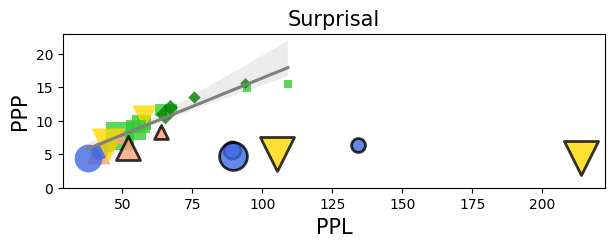

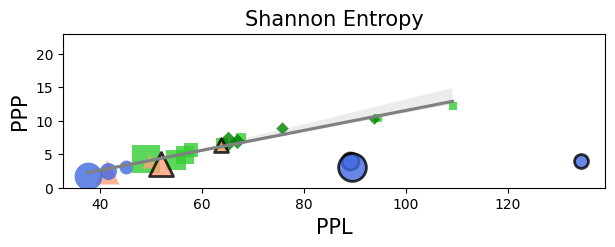

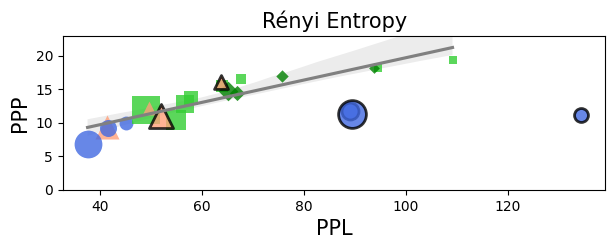

In [2171]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(7, 2))
df_noinst = df_all[df_all["instruction"]==""]
sns.regplot(df_noinst, x='perplexity', y="surprisal_loglik", scatter=False, line_kws={"color": "gray"})
for i in range(len(df_noinst)):
    plt.scatter(x=df_noinst['perplexity'].iloc[i],
                 y=df_noinst['surprisal_loglik'].iloc[i], 
                 color=model2color[df_noinst["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_noinst["model"].iloc[i]]), 
                 linewidths=model2line[df_noinst["model"].iloc[i]], 
                 marker=model2shape[df_noinst["model"].iloc[i]],
                 edgecolors="black")

df_target = df[df["prompt"]=="Please complete the following sentence"]
for i in range(len(df_target)):
    plt.scatter(x=df_target['perplexity'].iloc[i],
                 y=df_target['surprisal_loglik'].iloc[i], 
                 color=model2color[df_target["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_target["model"].iloc[i]]), 
                 linewidths=model2line[df_target["model"].iloc[i]], 
                 marker=model2shape[df_target["model"].iloc[i]],
                 edgecolors="black")

# Label the axes
plt.ylim(0, 23)
plt.xlabel('PPL', fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.title('Surprisal', fontsize=15)
plt.savefig("NS_surprisal_prompt_complete_only.pdf", bbox_inches='tight')

plt.figure(figsize=(7, 2))
df_noinst = df_all[(df_all["instruction"]=="") & (df_all["renyi_loglik"] > 0)]
sns.regplot(df_noinst, x='perplexity', y="entropy_loglik", scatter=False, line_kws={"color": "gray"})
for i in range(len(df_noinst)):
    plt.scatter(x=df_noinst['perplexity'].iloc[i],
                 y=df_noinst['entropy_loglik'].iloc[i], 
                 color=model2color[df_noinst["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_noinst["model"].iloc[i]]), 
                 linewidths=model2line[df_noinst["model"].iloc[i]], 
                 marker=model2shape[df_noinst["model"].iloc[i]],
                 edgecolors="black")

df_target = df[(df["prompt"]=="Please complete the following sentence") & (df["entropy_loglik"] > 0)]
for i in range(len(df_target)):
    plt.scatter(x=df_target['perplexity'].iloc[i],
                 y=df_target['entropy_loglik'].iloc[i], 
                 color=model2color[df_target["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_target["model"].iloc[i]]), 
                 linewidths=model2line[df_target["model"].iloc[i]], 
                 marker=model2shape[df_target["model"].iloc[i]],
                 edgecolors="black")
    
# plt.xlim(50, 400)
plt.ylim(0, 23)
plt.xlabel('PPL', fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.title('Shannon Entropy', fontsize=15)
plt.savefig("NS_entropy_prompt_complete_only.pdf", bbox_inches='tight')

plt.figure(figsize=(7, 2))
df_noinst = df_all[(df_all["instruction"]=="") & (df_all["renyi_loglik"] > 0)]
sns.regplot(df_noinst, x='perplexity', y="renyi_loglik", scatter=False, line_kws={"color": "gray"})
for i in range(len(df_noinst)):
    plt.scatter(x=df_noinst['perplexity'].iloc[i],
                 y=df_noinst['renyi_loglik'].iloc[i], 
                 color=model2color[df_noinst["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_noinst["model"].iloc[i]]), 
                 linewidths=model2line[df_noinst["model"].iloc[i]], 
                 marker=model2shape[df_noinst["model"].iloc[i]],
                 edgecolors="black")

df_target = df[(df["prompt"]=="Please complete the following sentence") & (df["renyi_loglik"] > 0)]
for i in range(len(df_target)):
    plt.scatter(x=df_target['perplexity'].iloc[i],
                 y=df_target['renyi_loglik'].iloc[i], 
                 color=model2color[df_target["model"].iloc[i]], 
                 alpha=0.8, 
                 s=int(model2size[df_target["model"].iloc[i]]), 
                 linewidths=model2line[df_target["model"].iloc[i]], 
                 marker=model2shape[df_target["model"].iloc[i]],
                 edgecolors="black")
    
# plt.xlim(50, 400)
plt.ylim(0, 23)
plt.xlabel('PPL', fontsize=15)
plt.ylabel('PPP',fontsize=15)
plt.title('Rényi Entropy', fontsize=15)

plt.margins(x=None, y=None)
plt.savefig("NS_renyi_prompt_complete_only.pdf", bbox_inches='tight')
plt.show()